In [1]:
import pandas as pd
import re

import matplotlib.pyplot as plt
import seaborn as sns

import preprocessing 

In [2]:
url = 'https://www.census.gov/construction/bps/txt/tb3u2015.txt'

In [ ]:
for i in range(2006, 2020):

13.356410256410257

In [467]:
var = 201999

In [ ]:
re.

In [393]:
df = pd.read_csv(url, header=8, sep = ":", skipfooter=2, engine='python')

In [388]:
df.shape

(405, 1)

In [389]:
df.head(50)

,CSA CBSA Name Total 1 Unit 2 Units Units or more or more
0,"999 10180 Abilene, TX ..."
1,"184 10420 Akron, OH ..."
2,"999 10500 Albany, GA ..."
3,"440 10540 Albany, OR ..."
4,"104 10580 Albany-Schenectady-Troy, NY ..."
5,"106 10740 Albuquerque,* NM ..."
6,"999 10780 Alexandria, LA ..."
7,"408 10900 Allentown-Bethlehem-Easton,* PA-NJ ..."
8,"999 11020 Altoona, PA ..."
9,"108 11100 Amarillo, TX ..."


In [343]:
df[df.index == 38]

,column1
38,VA ...


In [349]:
pd.read_fwf(url, )

,Table 3au. New Privately Owned Housing Units Authorized,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Unadjusted Units by Metropolitan Area,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Annual 2015,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,Num of
4,NaN,NaN,NaN,NaN,NaN,NaN,Struc-
...,...,...,...,...,...,...,...
413,"472 49700 Yuba City, CA ...",NaN,0,NaN,32,97,8
414,"999 49740 Yuma, AZ ...",NaN,0,NaN,3,0,0
415,NaN,NaN,NaN,NaN,NaN,NaN,NaN
416,* - Metropolitan areas where all permit office...,NaN,NaN,NaN,NaN,NaN,NaN


In [289]:
# import re
# import pandas as pd


# data =  pd.read_table(url, header=8, skipfooter=2, sep="\s+")


# data = data.split("\n")


# result = []
# ind = 0

# while ind < len(data):

#     if re.match(r"^[a-zA-Z].+\)$", data[ind]):
#         result.append(data[ind].strip() + data[ind + 1])

#         ind += 2

#     else:
#         result.append(data[ind])
#         ind += 1


# dict_result = {}
# for i, x in enumerate(result):
#     tmp = x.split()
#     if len(tmp) == 3:
#         dict_result[i] = tmp
#     if len(tmp) == 4:
#         dict_result[i] = [tmp[0] + tmp[1], tmp[2], tmp[3]]


# df_final = pd.DataFrame(dict_result).T


# col_names = df_final.iloc[0, :]
# df_final.drop(0, axis=0, inplace=True)
# df_final.columns = col_names

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """


AttributeError: 'DataFrame' object has no attribute 'split'

In [424]:
df.re

,column1
0,"999 10180 Abilene, TX ..."
1,"184 10420 Akron, OH ..."
2,"999 10500 Albany, GA ..."
3,"440 10540 Albany, OR ..."
4,"104 10580 Albany-Schenectady-Troy, NY ..."
...,...
400,"999 49420 Yakima, WA ..."
401,"276 49620 York-Hanover, PA ..."
402,"566 49660 Youngstown-Warren-Boardman, OH-PA ..."
403,"472 49700 Yuba City, CA ..."


In [461]:
df = pd.read_table(url, header=8, skipfooter=2, sep=":")

df = df.rename(columns={'CSA CBSA  Name                                   Total 1 Unit 2 Units   Units  or more  or more':'column1'})

df.reset_index()

line_re = re.compile(r'''
        (?P<csa>\d+)\s+
        (?P<cbsa>\d+)\s+
        (?P<city>.+),\*?\s+
        (?P<state>.+)\s+
        (?P<one>\d+)\s+
        (?P<two>\d+)\s+
        (?P<three>\d+)\s+
        (?P<four>\d+)\s+
        (?P<multifamily_units>\d+)\s+
        (?P<multifamily_structures>\d+$)''', re.VERBOSE)




oklist = []
clean_list = []
same_list = []

for row in range(404):

    if re.search(line_re, df.column1[row]) == None and re.search(r'^\d', df.column1[row]) != None:
        rowa = df.iloc[row,]
        row = row + 1
        rowb = df.iloc[row,]
#         df = df.drop(df.iloc[row-1,])
#         print(rowa)
#         print(rowb)
#         print()
#         print(rowa.append(rowb))
        new_row = rowa.append(rowb)
        new_row = str(new_row)
        clean_list.append(new_row)
#         new_row = rowa.append(rowb)
#         print(new_row)
#         clean_list = new_row.iloc[0:14].tolist()
#         oklist.append(clean_list)
    else:
        same_row = df.column1[row]
        same_list.append(same_row)

# pd.DataFrame(new_row)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [436]:
len(same_list)

380

In [438]:
len(clean_list)

24

In [449]:
same_df = pd.DataFrame(same_list)
same_df.columns

RangeIndex(start=0, stop=1, step=1)

In [465]:
same_df[0].apply(lambda x: line_re, x).groupdict()

NameError: name 'x' is not defined

In [445]:
pd.DataFrame(clean_list)

,0,1
0,"999 13980 Blacksburg-Christiansburg-Radford,",VA ...
1,"160 15380 Buffalo-Cheektowaga-Niagara Falls,",NY ...
2,"999 18880 Crestview-Fort Walton Beach-Destin,",FL ...
3,"209 19340 Davenport-Moline-Rock Island,* IA-IL",...
4,"422 19660 Deltona-Daytona Beach-Ormond Beach,*",FL ...
5,"999 22220 Fayetteville-Springdale-Rogers,",AR-MO ...
6,"278 25540 Hartford-West Hartford-East Hartford,",CT ...
7,"999 25940 Hilton Head Island-Bluffton-Beaufort,",SC ...
8,"288 26420 Houston-The Woodlands-Sugar Land,*",TX ...
9,"340 30780 Little Rock-North Little Rock-Conway,",AR ...


In [243]:
df = df.rename(columns={'index': 'first', 'CSA CBSA  Name                                   Total 1 Unit 2 Units   Units  or more  or more':'second'})

In [247]:
df.second[101]

'* IA        5707    3374     302      15    2016      64'

In [277]:
# first_re = re.compile(r'''
#                     (?P<csa>\d+)\s+
#                     (?P<cbsa>\d+)\s+
#                     (?P<city>.+),''', re.VERBOSE)

first_re = '\s+?(?P<csa>\d+)\s+(?P<cbsa>\d+)\s+(?P<city>.+)'

In [278]:
df['first'].apply(lambda x: re.search(first_re, x))

0      None
1      None
2      None
3      None
4      None
       ... 
400    None
401    None
402    None
403    None
404    None
Name: first, Length: 405, dtype: object

In [287]:
df[df.index == 38]

,index,CSA,CBSA,Name,Total,1,Unit,2,Units,Units.1,or,more,or.1,more.1
38,38,VA,476,474,2,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [270]:
re.search(first_re, df['first'][0])

In [249]:
df.second.apply(lambda x: re.search(line_re, x))

TypeError: expected string or bytes-like object

In [248]:
line_re = re.compile(r'''\*?\s+
        (?P<state>.+)\s+
        (?P<one>\d+)\s+
        (?P<two>\d+)\s+
        (?P<three>\d+)\s+
        (?P<four>\d+)\s+
        (?P<multifamily_units>\d+)\s+
        (?P<multifamily_structures>\d+$)''', re.VERBOSE)

In [255]:
re.search(line_re, df.second[3])

<re.Match object; span=(0, 76), match=' OR                              365     344     >

In [280]:
for i in range(0, df.shape[0]):
    print(i)
    if re.search(line_re, df.second[i]) == None:
        print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37


TypeError: expected string or bytes-like object

In [260]:
df[df.index == 101]

,first,second
101,218 19780 Des Moines-West Des Moines,* IA 5707 3374 302 15 20...


In [204]:
working = df[df['or.1'].sort_values() >= 0]
working.head(2)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,CSA,CBSA,Name,Total,1,Unit,2,Units,Units.1,or,more,or.1,more.1
56,162,15980,Cape,Coral-Fort,"Myers,*",FL,6879,3819.0,26.0,192.0,2842.0,168.0,NaN
101,218,19780,Des,Moines-West,Des,"Moines,*",IA,5707.0,3374.0,302.0,15.0,2016.0,64.0


In [ ]:
if working['more.1'] =

In [175]:
len(df[df['more.1'].sort_values() >= 0]['more.1']), len(df[df['or.1'].sort_values() >= 0]['or.1'])

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(1, 11)

In [176]:
df[df['or.1'].sort_values() >= 0]['or.1']

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


56      168.0
101    2016.0
128       4.0
199       0.0
219     550.0
236       1.0
290      19.0
320      63.0
322     150.0
325     135.0
330      14.0
Name: or.1, dtype: float64

In [177]:
df[df['more'].sort_values() >= 0]['more']

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


12       3.0
16      28.0
17     192.0
18      18.0
20      22.0
       ...  
384     38.0
387      8.0
388      1.0
393      0.0
403      8.0
Name: more, Length: 118, dtype: float64

In [98]:
# squeeze=True turns into pd.Series, may be able to split on 

txt = pd.read_csv(url, sep=":" ,header=8, skipfooter=2, squeeze=True)

#lineterminator

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [59]:
input_list = list(txt['CSA CBSA  Name                                   Total 1 Unit 2 Units   Units  or more  or more'])
txt = pd.DataFrame({'column1': input_list})

In [94]:
txt.column1[86]

'999 18880 Crestview-Fort Walton Beach-Destin,'

In [87]:
line_re = re.compile(r'''
        (?P<csa>\d+)\s+
        (?P<cbsa>\d+)\s+
        (?P<city>.+),\*?\s+
        (?P<state>.+)\s+
        (?P<one>\d+)\s+
        (?P<two>\d+)\s+
        (?P<three>\d+)\s+
        (?P<four>\d+)\s+
        (?P<multifamily_units>\d+)\s+
        (?P<multifamily_structures>\d+$)''', re.VERBOSE)

sentence = '999 10180 Abilene, TX                             535     303       4       0     228      24'

In [88]:
elements = [re.search(line_re, x).groupdict() for x in input_series]

AttributeError: 'NoneType' object has no attribute 'groupdict'

In [89]:
for l in range(1, len(input_list)):
    if re.search(line_re, input_list[l]) == None:
        print(l)

37
38
50
51
86
87
93
94
98
99
122
123
156
157
160
161
166
167
214
215
234
235
240
241
253
254
257
258
262
263
283
284
292
293
306
307
314
315
326
327
333
334
361
362
379
380
385
386


In [51]:
re.search(line_re, input_series[0]).groupdict()

{'csa': '999',
 'cbsa': '10180',
 'city': 'Abilene',
 'state': 'TX',
 'one': '535',
 'two': '303',
 'three': '4',
 'four': '0',
 'multifamily_units': '228',
 'multifamily_structures': '24'}

In [44]:



# Exercise 3

# Write a regular expression to capture phone numbers. 
# It should match all of the following:
# (210) 867 5309
# +1 210.867.5309
# 867-5309
# 210-867-5309
numbers = [
    '(210) 867 5309',
    '+1 210.867.5309',
    '867-5309',
    '210-867-5309',
]

# Parts of a phone number
# Country Code +1, Area Code 210, Exchange Code 226, Line number 3232

phone_number_re = re.compile(r'''
^
(?P<country_code>\+\d+)?
\D*?
(?P<area_code>\d{3})?
\D*?
(?P<exchange_code>\d{3})
\D*?
(?P<line_number>\d{4})
\D*
$
''', re.VERBOSE)

# Iterate through the list of strings, producing a dictionary containing named groups from each string
phone_numbers = [re.search(phone_number_re, number).groupdict() for number in numbers]
phone_numbers

# And what can you do once you have a list of dictionaries? That's right! Make a Dataframe!
df = pd.DataFrame(phone_numbers)
df

,country_code,area_code,exchange_code,line_number
0,None,210,867,5309
1,+1,210,867,5309
2,None,None,867,5309
3,None,210,867,5309


In [9]:
elements

{'csa': '999',
 'cbsa': '10180',
 'city': 'Abilene',
 'state': 'TX',
 'one': '535',
 'two': '303',
 'three': '4',
 'four': '0',
 'multifamily_units': '228',
 'multifamily_structures': '24'}

In [55]:
txt.columns

Index(['CSA CBSA  Name                                   Total 1 Unit 2 Units   Units  or more  or more'], dtype='object')

,csa,cbsa,city,state,one,two,three,four,multifamily_units,multifamily_structures
0,999,10180,Abilene,TX,535,303,4,0,228,24


In [25]:
txt.columns[0]

'CSA CBSA  Name                                   Total 1 Unit 2 Units   Units  or more  or more'

In [ ]:
pd.set_option('display.max_colwidth', -1)
string = df.loc[0:2]
string

In [ ]:
url = 'https://www.census.gov/construction/bps/xls/msaannual_201999.xls'
sheet_count = 'MSA Units'
sheet_value = 'MSA Value'

count = pd.read_excel(url, sheet_name=sheet_1, header=5)

In [ ]:
value = pd.read_excel(url, sheet_name=sheet_1, header=5)

In [ ]:
pd.concat(value, count)

In [ ]:
count

In [ ]:
pd.read_clipboard()

In [127]:
df = preprocessing.get_model_df()

In [128]:
df = preprocessing.add_new_features(df)

In [129]:
df["city_state"] = df["city"] + "_" + df["state"]

city_mask = df.groupby("city_state").year.count()
city_mask = city_mask[city_mask == 15]
# apply city mask to shrink the df
def in_city_mask(x):
    return x in city_mask
df = df[df.city_state.apply(in_city_mask)]
df = df.sort_values(["city", "state", "year"])

In [130]:
df.head()

,city,state,year,quantity_of_mortgages_pop,total_mortgage_volume_pop,average_mortgage_volume_pop,median_mortgage_amount_pop,quantity_of_mortgages_nc,total_mortgage_volume_nc,average_mortgage_volume_nc,median_mortgage_amount_nc,label,city_state_vol_delta_pop,city_state_vol_delta_nc,city_state_qty_delta_pop,city_state_qty_delta_nc,market_volume,market_volume_delta,ei,city_state
1474,Atlanta,GA,2006,6,33186800,5.531133e+06,4457100.0,2.0,9181100.0,4590550.0,4590550.0,False,NaN,NaN,NaN,NaN,6774129256,NaN,NaN,Atlanta_GA
1850,Atlanta,GA,2007,8,28277600,3.534700e+06,3031150.0,2.0,4541700.0,2270850.0,2270850.0,False,-0.147926,-0.505321,0.333333,0.0,4973263164,-0.265845,1.160618,Atlanta_GA
7566,Atlanta,GA,2008,2,6735000,3.367500e+06,3367500.0,1.0,4950000.0,4950000.0,4950000.0,False,-0.761826,0.089900,-0.750000,-0.5,4444102426,-0.106401,0.266534,Atlanta_GA
752,Atlanta,GA,2009,9,49972900,5.552544e+06,4400000.0,1.0,3750000.0,3750000.0,3750000.0,False,6.419881,-0.242424,3.500000,0.0,7882704846,0.773745,4.183172,Atlanta_GA
449,Atlanta,GA,2010,11,68788385,6.253490e+06,5196100.0,2.0,7203500.0,3601750.0,3601750.0,False,0.376514,0.920933,0.222222,1.0,16193901958,1.054359,0.670046,Atlanta_GA


In [131]:
df["label_quantity_of_mortgages_pop_2y"] = (df.sort_values(["year"])
                                  .groupby(["city", "state"])[["quantity_of_mortgages_pop"]]
                                  .pct_change(2)
                                  .shift(-2))

In [132]:
# df["label_quantity_of_mortgages_pop_2y_delta"] = (df.sort_values(["year"])
#                                   .groupby(["city", "state"])[["label_quantity_of_mortgages_pop_2y"]]
#                                   .pct_change(2)
#                                   .shift(-2))

In [133]:
df["label_total_mortgage_volume_pop_2y"] = (df.sort_values(["year"])
                                  .groupby(["city", "state"])[["total_mortgage_volume_pop"]]
                                  .pct_change(2)
                                  .shift(-2))

In [134]:
df.head()

,city,state,year,quantity_of_mortgages_pop,total_mortgage_volume_pop,average_mortgage_volume_pop,median_mortgage_amount_pop,quantity_of_mortgages_nc,total_mortgage_volume_nc,average_mortgage_volume_nc,...,city_state_vol_delta_pop,city_state_vol_delta_nc,city_state_qty_delta_pop,city_state_qty_delta_nc,market_volume,market_volume_delta,ei,city_state,label_quantity_of_mortgages_pop_2y,label_total_mortgage_volume_pop_2y
1474,Atlanta,GA,2006,6,33186800,5.531133e+06,4457100.0,2.0,9181100.0,4590550.0,...,NaN,NaN,NaN,NaN,6774129256,NaN,NaN,Atlanta_GA,NaN,NaN
1850,Atlanta,GA,2007,8,28277600,3.534700e+06,3031150.0,2.0,4541700.0,2270850.0,...,-0.147926,-0.505321,0.333333,0.0,4973263164,-0.265845,1.160618,Atlanta_GA,NaN,NaN
7566,Atlanta,GA,2008,2,6735000,3.367500e+06,3367500.0,1.0,4950000.0,4950000.0,...,-0.761826,0.089900,-0.750000,-0.5,4444102426,-0.106401,0.266534,Atlanta_GA,0.0,-0.812906
752,Atlanta,GA,2009,9,49972900,5.552544e+06,4400000.0,1.0,3750000.0,3750000.0,...,6.419881,-0.242424,3.500000,0.0,7882704846,0.773745,4.183172,Atlanta_GA,4.5,9.213569
449,Atlanta,GA,2010,11,68788385,6.253490e+06,5196100.0,2.0,7203500.0,3601750.0,...,0.376514,0.920933,0.222222,1.0,16193901958,1.054359,0.670046,Atlanta_GA,4.5,14.076042


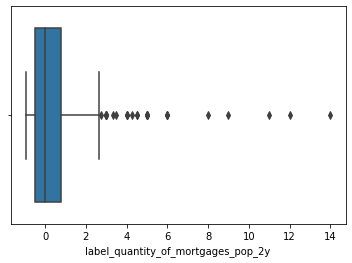

In [135]:
sns.boxplot(df.label_quantity_of_mortgages_pop_2y)

In [136]:
Q3 = df.label_quantity_of_mortgages_pop_2y.quantile(.75)
Q1 = df.label_quantity_of_mortgages_pop_2y.quantile(.25)
upper_fence_quantity = Q3 + ((Q3-Q1)*1.5)
upper_fence_quantity

2.7361111111111116

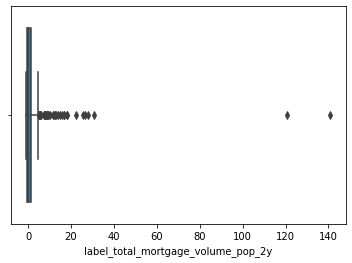

In [137]:
sns.boxplot(df.label_total_mortgage_volume_pop_2y)

In [138]:
Q3 = df.label_total_mortgage_volume_pop_2y.quantile(.75)
Q1 = df.label_total_mortgage_volume_pop_2y.quantile(.25)
upper_fence_volume = Q3 + ((Q3-Q1)*1.5)
upper_fence_volume

4.627345980695253

In [139]:
df['should_enter'] = (df.label_total_mortgage_volume_pop_2y > upper_fence_volume) | (df.label_quantity_of_mortgages_pop_2y > upper_fence_quantity)





In [140]:
df.should_enter.sum()

51

In [141]:
def labeling_future_data(df):
    """this function takes in a data frame and returns a boolean column that identifies
    if a city_state_year is a market that should be entered"""
    
    df["label_quantity_of_mortgages_pop_2y"] = (df.sort_values(["year"])
                                  .groupby(["city", "state"])[["quantity_of_mortgages_pop"]]
                                  .pct_change(2)
                                  .shift(-2))
    
    df["label_total_mortgage_volume_pop_2y"] = (df.sort_values(["year"])
                                  .groupby(["city", "state"])[["total_mortgage_volume_pop"]]
                                  .pct_change(2)
                                  .shift(-2))
    
    Q3 = df.label_quantity_of_mortgages_pop_2y.quantile(.75)
    Q1 = df.label_quantity_of_mortgages_pop_2y.quantile(.25)
    upper_fence_quantity = Q3 + ((Q3-Q1)*1.5)
    upper_fence_quantity
    
    Q3 = df.label_total_mortgage_volume_pop_2y.quantile(.75)
    Q1 = df.label_total_mortgage_volume_pop_2y.quantile(.25)
    upper_fence_volume = Q3 + ((Q3-Q1)*1.5)
    upper_fence_volume
    
    df['should_enter'] = (df.label_total_mortgage_volume_pop_2y > upper_fence_volume) | (df.label_quantity_of_mortgages_pop_2y > upper_fence_quantity)
    
    return df

In [142]:
df.shape

(390, 23)

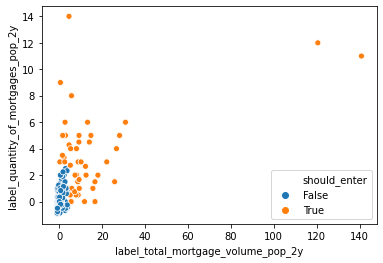

In [143]:
sns.scatterplot(x='label_total_mortgage_volume_pop_2y', y='label_quantity_of_mortgages_pop_2y', data=df, hue='should_enter')

In [115]:
# df = df.append(df[df.should_enter])
# df = df.append(df[df.should_enter])
# df = df.append(df[df.should_enter])

In [116]:
df.shape

(747, 23)

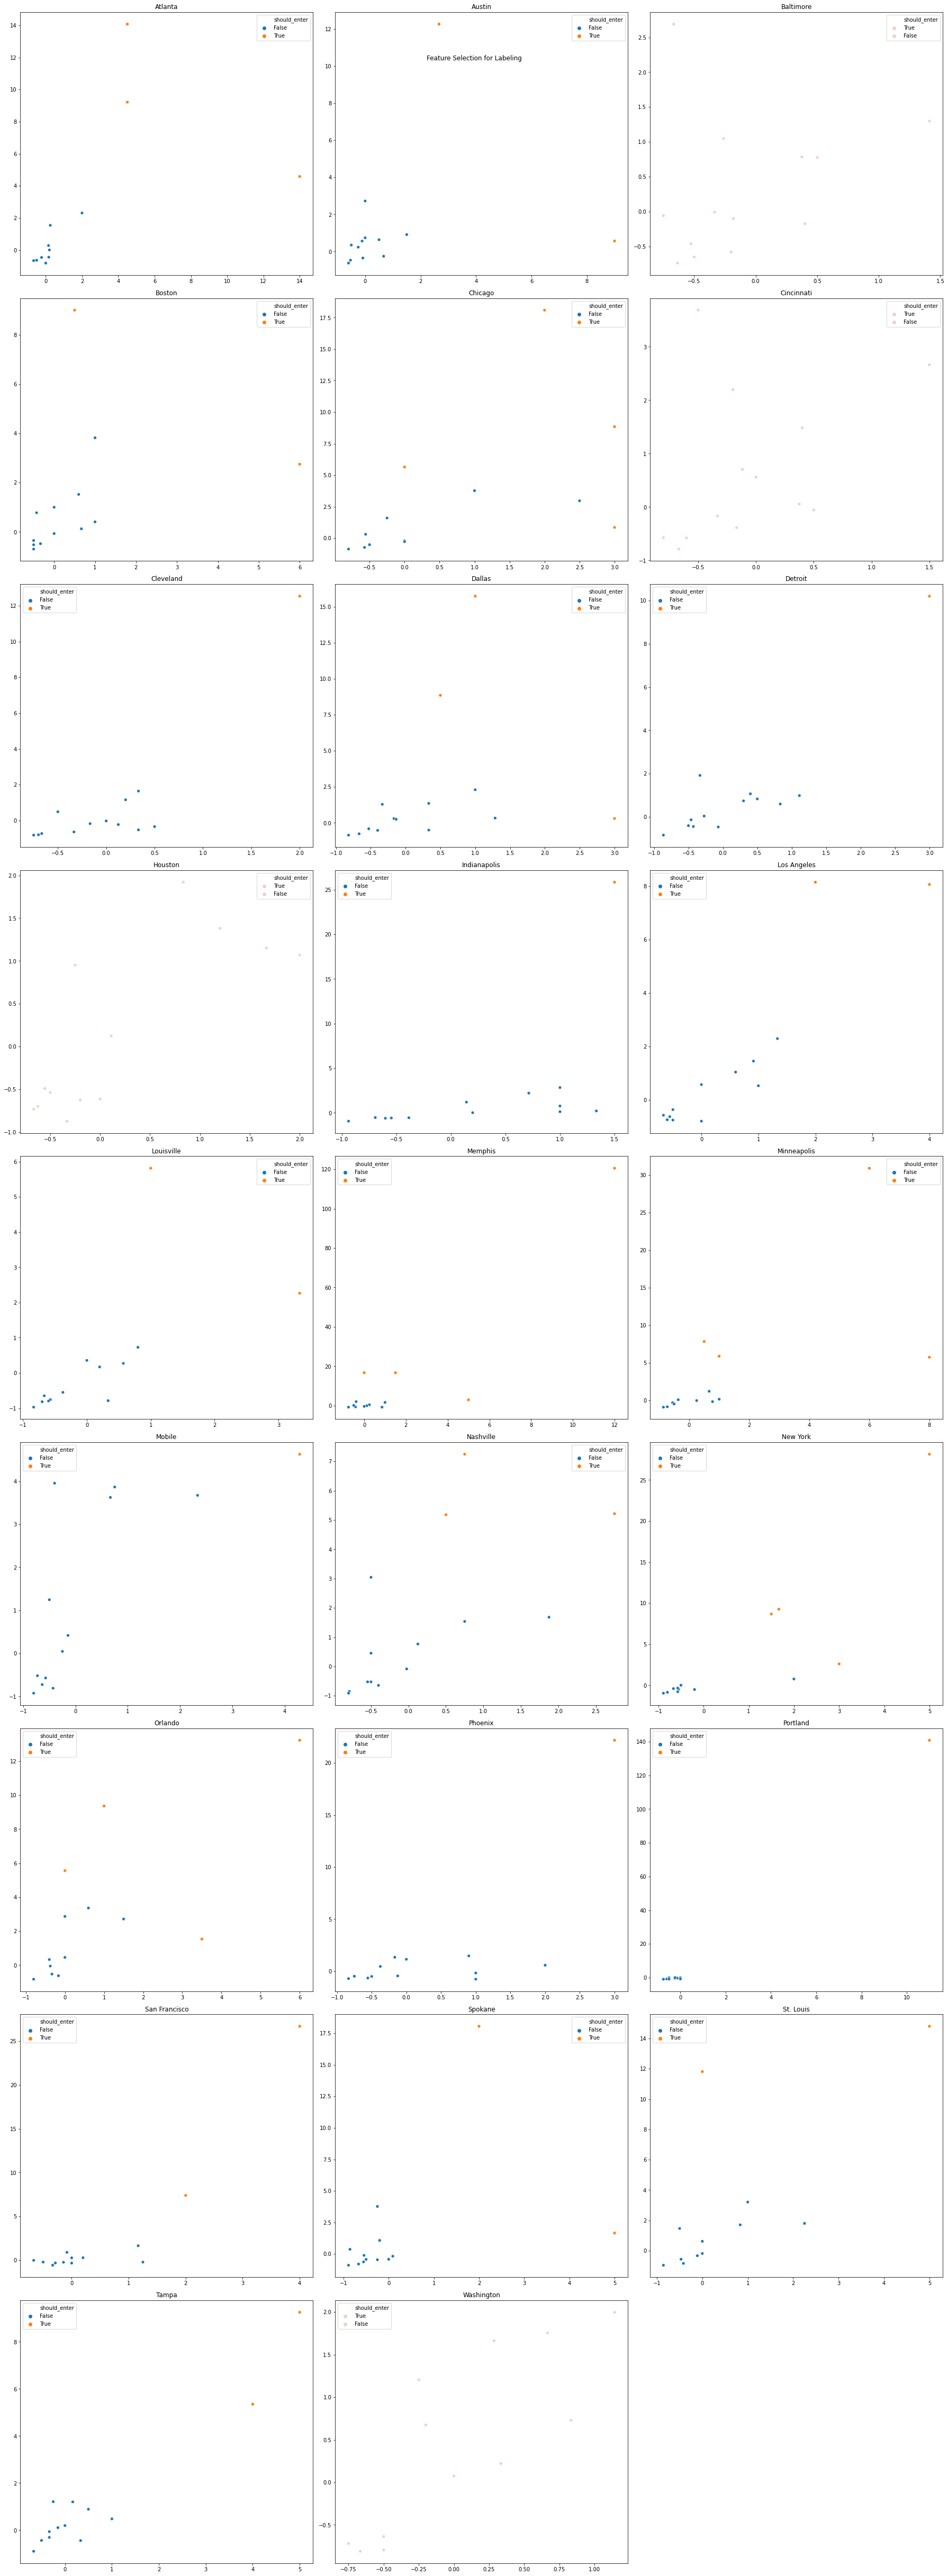

In [117]:
f = plt.figure(figsize=(25,75))
for i in range(0,26):
    f.add_subplot(10,3, i+1)
    sns.scatterplot(x='label_quantity_of_mortgages_pop_2y', y='label_total_mortgage_volume_pop_2y', data=df[df.city==df.city.unique()[i]], hue='should_enter')
    plt.title(df.city.unique()[i])
    plt.xlabel("")
    plt.ylabel("")
plt.tight_layout()
plt.suptitle("Feature Selection for Labeling")

plt.show()

In [118]:
df[df.city=='Atlanta']

,city,state,year,quantity_of_mortgages_pop,total_mortgage_volume_pop,average_mortgage_volume_pop,median_mortgage_amount_pop,quantity_of_mortgages_nc,total_mortgage_volume_nc,average_mortgage_volume_nc,...,city_state_vol_delta_nc,city_state_qty_delta_pop,city_state_qty_delta_nc,market_volume,market_volume_delta,ei,city_state,label_quantity_of_mortgages_pop_2y,label_total_mortgage_volume_pop_2y,should_enter
1474,Atlanta,GA,2006,6,33186800,5.531133e+06,4457100.0,2.0,9181100.0,4590550.0,...,NaN,NaN,NaN,6774129256,NaN,NaN,Atlanta_GA,NaN,NaN,False
1850,Atlanta,GA,2007,8,28277600,3.534700e+06,3031150.0,2.0,4541700.0,2270850.0,...,-0.505321,0.333333,0.0,4973263164,-0.265845,1.160618,Atlanta_GA,NaN,NaN,False
7566,Atlanta,GA,2008,2,6735000,3.367500e+06,3367500.0,1.0,4950000.0,4950000.0,...,0.089900,-0.750000,-0.5,4444102426,-0.106401,0.266534,Atlanta_GA,0.000000,-0.812906,False
752,Atlanta,GA,2009,9,49972900,5.552544e+06,4400000.0,1.0,3750000.0,3750000.0,...,-0.242424,3.500000,0.0,7882704846,0.773745,4.183172,Atlanta_GA,4.500000,9.213569,True
449,Atlanta,GA,2010,11,68788385,6.253490e+06,5196100.0,2.0,7203500.0,3601750.0,...,0.920933,0.222222,1.0,16193901958,1.054359,0.670046,Atlanta_GA,4.500000,14.076042,True
621,Atlanta,GA,2011,10,56215900,5.621590e+06,4341850.0,2.0,9274500.0,4637250.0,...,0.287499,-0.090909,0.0,17502078323,0.080782,0.756146,Atlanta_GA,0.200000,0.005581,False
616,Atlanta,GA,2012,12,56365900,4.697158e+06,3250100.0,1.0,3000000.0,3000000.0,...,-0.676532,0.200000,-0.5,21797876931,0.245445,0.805068,Atlanta_GA,14.000000,4.581443,True
126,Atlanta,GA,2013,19,138582800,7.293832e+06,6133600.0,NaN,NaN,NaN,...,0.000000,0.583333,0.0,24940177380,0.144156,2.148857,Atlanta_GA,0.250000,1.541315,False
208,Atlanta,GA,2014,11,106803300,9.709391e+06,4919700.0,1.0,15861400.0,15861400.0,...,4.287133,-0.421053,0.0,16405588955,-0.342202,1.171610,Atlanta_GA,-0.230769,-0.463824,False
2792,Atlanta,GA,2015,4,20900000,5.225000e+06,5750000.0,1.0,5500000.0,5500000.0,...,-0.653246,-0.636364,0.0,13569931547,-0.172847,0.236579,Atlanta_GA,0.166667,-0.444851,False


In [119]:
df.head()

,city,state,year,quantity_of_mortgages_pop,total_mortgage_volume_pop,average_mortgage_volume_pop,median_mortgage_amount_pop,quantity_of_mortgages_nc,total_mortgage_volume_nc,average_mortgage_volume_nc,...,city_state_vol_delta_nc,city_state_qty_delta_pop,city_state_qty_delta_nc,market_volume,market_volume_delta,ei,city_state,label_quantity_of_mortgages_pop_2y,label_total_mortgage_volume_pop_2y,should_enter
1474,Atlanta,GA,2006,6,33186800,5.531133e+06,4457100.0,2.0,9181100.0,4590550.0,...,NaN,NaN,NaN,6774129256,NaN,NaN,Atlanta_GA,NaN,NaN,False
1850,Atlanta,GA,2007,8,28277600,3.534700e+06,3031150.0,2.0,4541700.0,2270850.0,...,-0.505321,0.333333,0.0,4973263164,-0.265845,1.160618,Atlanta_GA,NaN,NaN,False
7566,Atlanta,GA,2008,2,6735000,3.367500e+06,3367500.0,1.0,4950000.0,4950000.0,...,0.089900,-0.750000,-0.5,4444102426,-0.106401,0.266534,Atlanta_GA,0.0,-0.812906,False
752,Atlanta,GA,2009,9,49972900,5.552544e+06,4400000.0,1.0,3750000.0,3750000.0,...,-0.242424,3.500000,0.0,7882704846,0.773745,4.183172,Atlanta_GA,4.5,9.213569,True
449,Atlanta,GA,2010,11,68788385,6.253490e+06,5196100.0,2.0,7203500.0,3601750.0,...,0.920933,0.222222,1.0,16193901958,1.054359,0.670046,Atlanta_GA,4.5,14.076042,True


In [473]:
sample = pd.DataFrame([x for x in range(1,20)])
sample['test_column'] = sample[0] * 2
sample['off_one'] = sample.test_column.pct_change(1)
sample['off_two'] = sample.test_column.pct_change(2)
sample['off_one_shift'] = sample.test_column.pct_change(1).shift(-1)
sample['off_two_shift'] = sample.test_column.pct_change(2).shift(-2)
sample

,0,test_column,off_one,off_two,off_one_shift,off_two_shift
0,1,2,NaN,NaN,1.000000,2.000000
1,2,4,1.000000,NaN,0.500000,1.000000
2,3,6,0.500000,2.000000,0.333333,0.666667
3,4,8,0.333333,1.000000,0.250000,0.500000
4,5,10,0.250000,0.666667,0.200000,0.400000
5,6,12,0.200000,0.500000,0.166667,0.333333
6,7,14,0.166667,0.400000,0.142857,0.285714
7,8,16,0.142857,0.333333,0.125000,0.250000
8,9,18,0.125000,0.285714,0.111111,0.222222
9,10,20,0.111111,0.250000,0.100000,0.200000


In [ ]:
def labeling_future_data(df):
    """this function takes in a data frame and returns a boolean column that identifies
    if a city_state_year is a market that should be entered"""
    
    df["five_or_more_units_bldgs_est_2y"] = (df.sort_values(["year"])
                                  .groupby(["city", "state"])[["total_high_density_bldgs"]]
                                  .pct_change(2)
                                  .shift(-2))
    
    df["five_or_more_units_value_est_2y"] = (df.sort_values(["year"])
                                  .groupby(["city", "state"])[["total_high_density_value"]]
                                  .pct_change(2)
                                  .shift(-2))
    
    Q3 = df.five_or_more_units_bldgs_est_2y.quantile(.75)
    
    Q1 = df.five_or_more_units_bldgs_est_2y.quantile(.25)
    
    upper_fence_quantity = Q3 + ((Q3-Q1)*1.5)
    
    Q3 = df.five_or_more_units_value_est_2y.quantile(.75)
    
    Q1 = df.five_or_more_units_value_est_2y.quantile(.25)
    
    upper_fence_volume = Q3 + ((Q3-Q1)*1.5)
    
    df['should_enter'] = (df.five_or_more_units_value_est_2y > upper_fence_volume) | (df.five_or_more_units_bldgs_est_2y > upper_fence_quantity)
    
    return df

In [474]:
sample.head(30)

,0,test_column,off_one,off_two,off_one_shift,off_two_shift
0,1,2,NaN,NaN,1.000000,2.000000
1,2,4,1.000000,NaN,0.500000,1.000000
2,3,6,0.500000,2.000000,0.333333,0.666667
3,4,8,0.333333,1.000000,0.250000,0.500000
4,5,10,0.250000,0.666667,0.200000,0.400000
5,6,12,0.200000,0.500000,0.166667,0.333333
6,7,14,0.166667,0.400000,0.142857,0.285714
7,8,16,0.142857,0.333333,0.125000,0.250000
8,9,18,0.125000,0.285714,0.111111,0.222222
9,10,20,0.111111,0.250000,0.100000,0.200000
